In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_2012 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2012.csv")
file_2013 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2013.csv")
file_2014 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2014.csv")
file_2015 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2015.csv")
file_2016 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2016.csv")
file_2017 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2017.csv")
file_2018 = os.path.join("..","Resources","Texas_Cities_Crime_Resources","Texas_2018.csv")

In [240]:
raw_2012_df = pd.read_csv(file_2012)
raw_2013_df = pd.read_csv(file_2013)
raw_2014_df = pd.read_csv(file_2014)
raw_2015_df = pd.read_csv(file_2015)
raw_2016_df = pd.read_csv(file_2016)
raw_2017_df = pd.read_csv(file_2017)
raw_2018_df = pd.read_csv(file_2018)

In [241]:
# Rename columns to match names prior to full append of data
# Only run once
# 2012
raw_2012_df = raw_2012_df.rename(columns = {"Forcible\nrape":"Rape"})

# 2013
raw_2013_df = raw_2013_df.fillna(0)
raw_2013_df['Rape\n(revised\ndefinition)1'] = raw_2013_df['Rape\n(revised\ndefinition)1'] +  raw_2013_df['Rape\n(legacy\ndefinition)2']
raw_2013_df = raw_2013_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1)
raw_2013_df = raw_2013_df.rename(columns = {"Rape\n(revised\ndefinition)1":"Rape","Arson3": "Arson"})

# 2014
raw_2014_df = raw_2014_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1)
raw_2014_df = raw_2014_df.rename(columns = {"Rape\n(revised\ndefinition)1":"Rape"})

# 2015
raw_2015_df.drop(['Rape\n(legacy\ndefinition)2'], axis=1, inplace=True)
raw_2015_df = raw_2015_df.rename(columns = {"Rape\n(revised\ndefinition)1": "Rape"})

# 2016
raw_2016_df.drop(['Rape\n(legacy\ndefinition2)'], axis=1, inplace=True)
raw_2016_df = raw_2016_df.rename(columns = {"Rape\n(revised\ndefinition1)": "Rape"})

# 2017
raw_2017_df = raw_2017_df.rename(columns = {"Rape1": "Rape", "Cities": "City"} )

# 2018
raw_2018_df = raw_2018_df.rename(columns = {"Rape1": "Rape", "State": "City"})

In [242]:
# Raw file prior to clean up
crime_df = raw_2012_df.append([raw_2013_df, raw_2014_df, raw_2015_df, raw_2016_df, raw_2017_df, raw_2018_df])
# crime_df = crime_df[(crime_df["City"] == "Houston") | (crime_df["City"] == "Pasadena") |(crime_df["City"] == "League City") | (crime_df["City"] == "Sugar Land") | (crime_df["City"] == "Conroe") | (crime_df["City"] == "Baytown") | (crime_df["City"] == "Missouri City") | (crime_df["City"] == "Galveston") | (crime_df["City"] == "Texas City") | (crime_df["City"] == "Friendswood")]
crime_df = crime_df.rename(columns = {"Violent\ncrime":"Violent Crime", "Murder and\nnonnegligent\nmanslaughter":"Murder", "Aggravated\nassault":"Aggravated Assault","Property\ncrime":"Property Crime","Larceny-\ntheft":"Larceny Theft","Motor\nvehicle\ntheft":"Motor/Vehicle Theft"})
output_file = os.path.join("..","Resources","Crime_Merged.csv")
crime_df.to_csv(output_file, index=False)
crime_df = crime_df.dropna()

In [243]:
# Pull information for only cities of interest
crime_df = crime_df[(crime_df["City"] == "Houston") | (crime_df["City"] == "Pasadena") |(crime_df["City"] == "League City") | (crime_df["City"] == "Sugar Land") | (crime_df["City"] == "Conroe") | (crime_df["City"] == "Baytown") | (crime_df["City"] == "Missouri City") | (crime_df["City"] == "Galveston") | (crime_df["City"] == "Texas City") | (crime_df["City"] == "Friendswood")]
crime_df

,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor/Vehicle Theft,Arson
35,Baytown,2012.0,"74,420",247,5.0,15,97,130,"3,684",939,"2,438",307,23.0
115,Conroe,2012.0,"59,856",221,2.0,13,74,132,"2,061",447,"1,501",113,1.0
194,Friendswood,2012.0,"36,965",15,0.0,4,4,7,353,66,274,13,0.0
198,Galveston,2012.0,"49,170",296,2.0,37,118,139,"2,469",517,"1,792",160,12.0
255,Houston,2012.0,"2,177,273","21,610",217.0,665,"9,385","11,343","107,678","26,630","67,978","13,070",754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,League City,2018.0,"105,351",97,3.0,34,18,42,"1,718",218,"1,407",93,3.0
367,Missouri City,2018.0,"75,863",149,2.0,23,46,78,969,133,767,69,0.0
415,Pasadena,2018.0,"154,000",711,5.0,93,195,418,"3,773",636,"2,758",379,23.0
535,Sugar Land,2018.0,"89,790",71,0.0,15,36,20,"1,289",158,"1,075",56,0.0


### Total Crime per Capita for Each City   

In [244]:
crime_df.dtypes

City                    object
Year                   float64
Population              object
Violent Crime           object
Murder                 float64
Rape                    object
Robbery                 object
Aggravated Assault      object
Property Crime          object
Burglary                object
Larceny Theft           object
Motor/Vehicle Theft     object
Arson                  float64
dtype: object

In [245]:
# Create a list of columns we want to change and iterate over the dataframe.
object_list = ['Population', 'Violent Crime', 'Rape', 'Robbery','Aggravated Assault','Property Crime','Burglary','Larceny Theft','Motor/Vehicle Theft']

for columns in object_list:
    try:
        crime_df[columns] = crime_df[columns].replace(',','',regex=True)
        
    except:
        print(f', removal failed for {columns}')
        
    try:
        crime_df[columns] = crime_df[columns].astype(float)
        
    except:
        print(f'Float conversion failed for {columns}')
        
crime_df['Year'] = crime_df['Year'].astype(int)
crime_df

,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor/Vehicle Theft,Arson
35,Baytown,2012,74420.0,247.0,5.0,15.0,97.0,130.0,3684.0,939.0,2438.0,307.0,23.0
115,Conroe,2012,59856.0,221.0,2.0,13.0,74.0,132.0,2061.0,447.0,1501.0,113.0,1.0
194,Friendswood,2012,36965.0,15.0,0.0,4.0,4.0,7.0,353.0,66.0,274.0,13.0,0.0
198,Galveston,2012,49170.0,296.0,2.0,37.0,118.0,139.0,2469.0,517.0,1792.0,160.0,12.0
255,Houston,2012,2177273.0,21610.0,217.0,665.0,9385.0,11343.0,107678.0,26630.0,67978.0,13070.0,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,League City,2018,105351.0,97.0,3.0,34.0,18.0,42.0,1718.0,218.0,1407.0,93.0,3.0
367,Missouri City,2018,75863.0,149.0,2.0,23.0,46.0,78.0,969.0,133.0,767.0,69.0,0.0
415,Pasadena,2018,154000.0,711.0,5.0,93.0,195.0,418.0,3773.0,636.0,2758.0,379.0,23.0
535,Sugar Land,2018,89790.0,71.0,0.0,15.0,36.0,20.0,1289.0,158.0,1075.0,56.0,0.0


In [246]:
# Create new dataframe that will be utilized to graph. Unsure about error messages.
crime_graph_df = crime_df[['City','Year','Population','Violent Crime', 'Property Crime']]
crime_graph_df["Total Crime"] = crime_graph_df['Violent Crime'] + crime_graph_df['Property Crime']


C:\Users\Sam\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
# Illustrate graphing data frame
crime_graph_df

,City,Year,Population,Violent Crime,Property Crime,Total Crime
35,Baytown,2012,74420.0,247.0,3684.0,3931.0
115,Conroe,2012,59856.0,221.0,2061.0,2282.0
194,Friendswood,2012,36965.0,15.0,353.0,368.0
198,Galveston,2012,49170.0,296.0,2469.0,2765.0
255,Houston,2012,2177273.0,21610.0,107678.0,129288.0
...,...,...,...,...,...,...
319,League City,2018,105351.0,97.0,1718.0,1815.0
367,Missouri City,2018,75863.0,149.0,969.0,1118.0
415,Pasadena,2018,154000.0,711.0,3773.0,4484.0
535,Sugar Land,2018,89790.0,71.0,1289.0,1360.0


In [248]:
# Add additional breakdown per capita for graph
crime_graph_df['Total Crime Per Capita [10,000]'] = (crime_graph_df['Total Crime'] / crime_graph_df['Population'])*10000
crime_graph_df['Violent Crime Per Capita [10,000]'] = (crime_graph_df['Violent Crime'] / crime_graph_df['Population'])*10000
crime_graph_df['Property Crime Per Capita [10,000]'] = (crime_graph_df['Property Crime'] / crime_graph_df['Population'])*10000

C:\Users\Sam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sam\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sam\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [249]:
# Illustrate graphing data frame
crime_graph_df

,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
35,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
115,Conroe,2012,59856.0,221.0,2061.0,2282.0,381.248329,36.921946,344.326383
194,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
198,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
255,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
...,...,...,...,...,...,...,...,...,...
319,League City,2018,105351.0,97.0,1718.0,1815.0,172.281231,9.207316,163.073915
367,Missouri City,2018,75863.0,149.0,969.0,1118.0,147.370919,19.640668,127.730251
415,Pasadena,2018,154000.0,711.0,3773.0,4484.0,291.168831,46.168831,245.000000
535,Sugar Land,2018,89790.0,71.0,1289.0,1360.0,151.464528,7.907339,143.557189


In [250]:
# Create a spaghetti plot for the data set
city_list = crime_graph_df['City'].unique()
year_list = crime_graph_df['Year'].unique()
year_list



array([2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
for city in city_list:
    y_axis = crime_graph_df[['Total Crime Per Capita [10,000]']].loc[crime_graph_df['City'] == city]

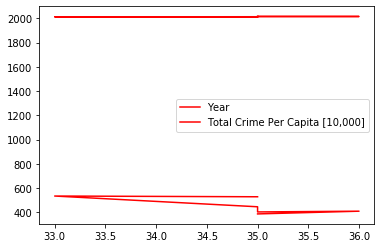

In [255]:
baytown_df = crime_graph_df[['Year','Total Crime Per Capita [10,000]']].loc[crime_graph_df['City'] == 'Baytown']
baytown_df.plot(color='red')

### Create dataframes for types of crimes per city per year

### Create demographics database based on crimes.

### Utilize Google API to map crime and create a intensity graph based on violent crime percentage/per capita 

### Dive deeper into crime data set by illustrating the history of crime for the major cities in question. (This wont be part of the over all analysis but it would be good to show and discuss)